In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('food_data_csv/FOOD-DATA-GROUP1.csv')
data2 = pd.read_csv('food_data_csv/FOOD-DATA-GROUP2.csv')
data3 = pd.read_csv('food_data_csv/FOOD-DATA-GROUP3.csv')
data4 = pd.read_csv('food_data_csv/FOOD-DATA-GROUP4.csv')
data5 = pd.read_csv('food_data_csv/FOOD-DATA-GROUP5.csv')
data1.shape, data2.shape, data3.shape, data4.shape, data5.shape

((551, 37), (319, 37), (571, 37), (232, 37), (722, 37))

In [3]:
df = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)
df

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,717,717,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,718,718,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,719,719,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,720,720,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [4]:
substring = 'egg'

df[df['food'].str.contains(substring, case=False, na=False)]

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
58,58,58,chinese egg roll,223,10.600,1.900,2.700,5.00,24.300,0.000,...,35.600,0.100,1.300,16.0,0.200,75.700,146.9,0.000,0.600,81.500
62,62,62,biscuit with egg cheese bacon,436,25.300,8.500,11.700,2.80,35.400,2.500,...,149.400,0.400,2.300,21.8,0.200,526.400,190.0,0.087,1.600,230.200
63,63,63,bagel with ham egg cheese,483,18.500,7.900,5.700,3.30,52.400,7.000,...,185.300,0.400,4.100,40.1,0.400,397.300,261.7,0.098,2.400,287.600
72,72,72,pork egg roll,189,6.100,1.300,2.000,2.10,25.100,4.500,...,28.900,0.024,1.300,17.0,0.300,77.400,180.2,0.071,0.800,96.500
76,76,76,scrambled eggs,100,7.600,2.900,2.800,0.90,1.000,0.800,...,26.800,0.093,1.200,6.6,0.066,113.700,69.1,0.012,0.800,44.726
79,79,79,chicken egg roll,158,3.600,0.800,1.100,1.50,22.800,4.500,...,37.600,0.056,1.400,24.0,0.300,94.400,224.8,0.032,0.400,84.750
80,80,80,vegetable egg roll,153,3.600,0.600,1.000,1.70,25.000,5.300,...,35.900,0.082,1.500,20.3,0.400,64.700,195.0,0.005,0.400,84.100
85,85,85,croissant with egg cheese,368,24.700,14.100,7.500,1.40,24.300,0.000,...,243.800,0.077,2.200,21.6,0.200,348.000,174.0,0.065,1.800,307.900
89,89,89,egg dinner roll,107,2.200,0.600,1.000,0.40,18.200,1.500,...,20.700,0.040,1.200,8.8,0.200,35.400,36.4,0.066,0.400,46.913
90,90,90,english muffin with egg cheese sausage,472,29.900,11.400,11.200,4.60,28.800,2.500,...,277.200,0.300,4.300,28.1,0.300,297.000,242.6,0.064,1.700,362.700


In [5]:
# 8 features of data frame
X = df[['Fat', 'Saturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium']]
X

,Fat,Saturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium
0,5.000,2.900,0.8,0.500,0.900,0.000,14.6,0.016
1,19.400,10.900,3.1,2.700,7.800,0.000,62.9,0.300
2,3.600,2.300,0.9,3.400,0.800,0.100,0.0,0.000
3,2.000,1.300,1.5,0.091,1.500,0.000,9.8,0.017
4,2.300,1.400,1.2,0.900,1.200,0.000,8.1,0.046
...,...,...,...,...,...,...,...,...
2390,0.095,0.000,6.7,0.000,0.500,0.000,0.0,0.027
2391,0.099,0.027,0.2,0.034,0.062,0.089,0.0,0.084
2392,0.070,0.056,0.7,0.096,0.400,0.400,0.0,0.080
2393,0.300,0.036,3.3,2.200,1.800,1.100,0.0,0.014


In [6]:
X = df[['Protein', 'Fat']]
X

,Protein,Fat
0,0.900,5.000
1,7.800,19.400
2,0.800,3.600
3,1.500,2.000
4,1.200,2.300
...,...,...
2390,0.500,0.095
2391,0.062,0.099
2392,0.400,0.070
2393,1.800,0.300


Text(0, 0.5, 'Fat')

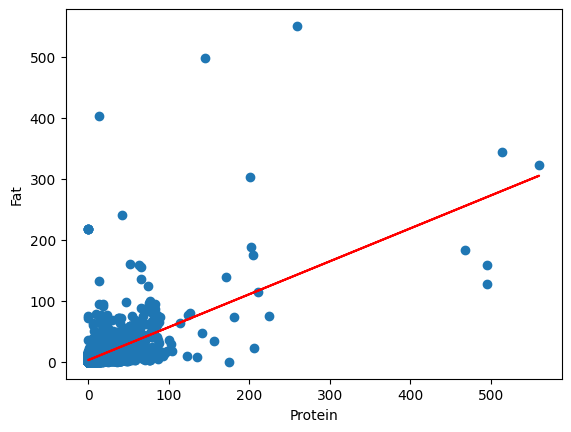

In [7]:
# regression line
slope, intercept = np.polyfit(df['Protein'], df['Fat'], 1)
y_pred = slope * df['Protein'] + intercept

plt.scatter(df['Protein'], df['Fat'], marker='o')
plt.plot(df['Protein'], y_pred, color='red')
plt.xlabel('Protein')
plt.ylabel('Fat')